In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r"IRIS.csv")

print(df.head())

df_binary = df[df['species'].isin(['Iris-versicolor', 'Iris-virginica'])]


print("Class distribution in the filtered dataset:")
print(df_binary['species'].value_counts())


X = df_binary[['petal_length', 'petal_width']].values
y1 = df_binary['species'].factorize()
print(y1)
y=y1[0]

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Class distribution in the filtered dataset:
species
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64), Index(['Iris-versicolor', 'Iris-virginica'], dtype='object'))


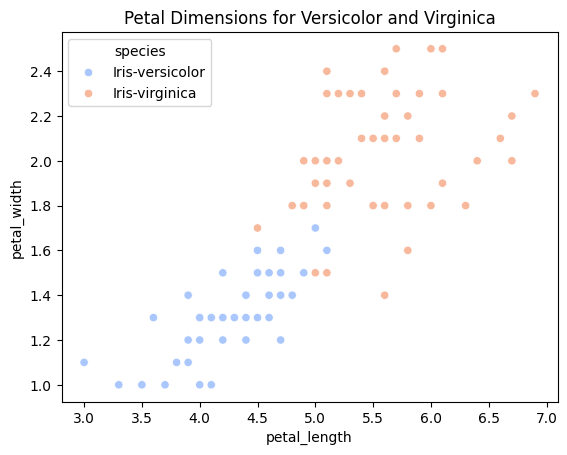

Training set class distribution: [35 35]
Test set class distribution: [15 15]


In [4]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df_binary, palette='coolwarm')
plt.title('Petal Dimensions for Versicolor and Virginica')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Class distribution in the filtered dataset:
species
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


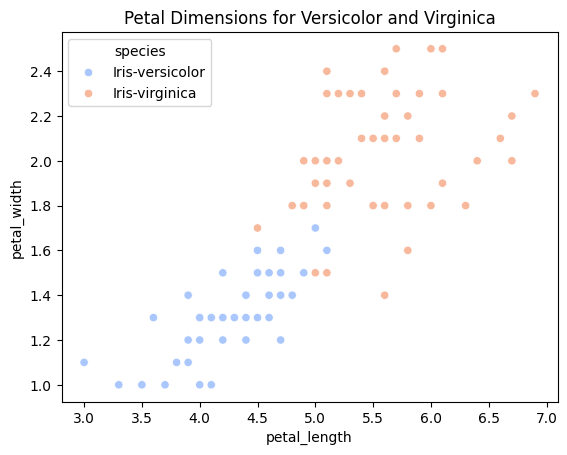

Training set class distribution: [35 35]
Test set class distribution: [15 15]
Cross-validation accuracy: 0.96 ± 0.03
Accuracy: 0.90
Precision: 0.93
Recall: 0.87
F1 Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
[[14  1]
 [ 2 13]]


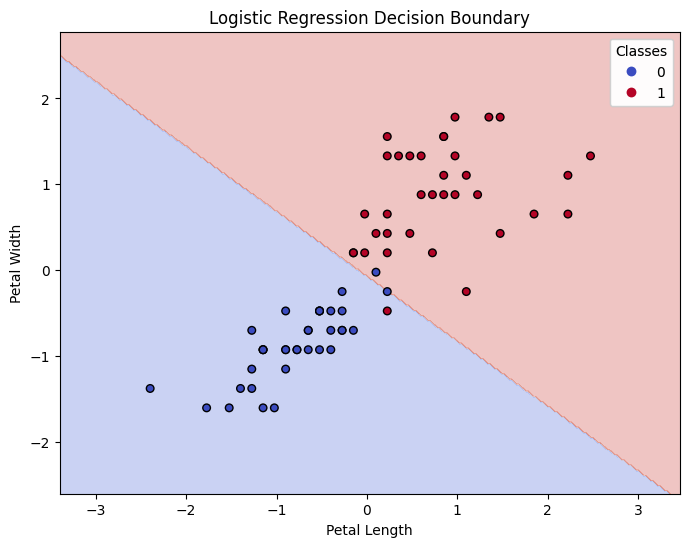

In [2]:



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42, C=1.0, solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)


cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print(f'Cross-validation accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


def plot_decision_boundaries(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend)


plt.figure(figsize=(8, 6))
plot_decision_boundaries(X_train, y_train, log_reg, 'Logistic Regression Decision Boundary')
plt.show()
